In [1]:
import pandas as pd

In [2]:
auto_data = pd.read_csv('../../Data/auto-mpg.data', delim_whitespace=True, header=None,
                       names = ['mpg', 'cylinders', 'displacement', 'horsepower',
                               'weight', 'acceleration', 'model', 'origin', 'car_name'])
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
len(auto_data.car_name.unique())

305

In [4]:
# A feature with 305 unique values in a sample of 398 will not help to learn a pattern from which to make prediction
auto_data = auto_data.drop('car_name', axis=1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
auto_data['origin'] = auto_data['origin'].replace({1:'America', 2:'Europe', 3:'Asia'})
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America


In [6]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [7]:
import numpy as np
auto_data = auto_data.replace('?', np.nan)
auto_data = auto_data.dropna()
auto_data.shape

(392, 10)

In [8]:
from sklearn.model_selection import train_test_split

x = auto_data.drop('mpg', axis=1)
y = auto_data.mpg

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [9]:
from sklearn.svm import SVR
rm = SVR(kernel='linear', C=.5)
rm.fit(x_train, y_train)
# The penalty factor for points which lies outside of our support vetor is initially set to C=1
# Intutively reducing penalty param emphasis on fitting the model to the data rather than penalizing points outside the marigin
# Epsilon(how wide our support vector marigin) within which no penalty is associated with the training loss function

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
rm.coef_

array([[-0.91314346,  0.02268979,  0.01915072, -0.00724669,  0.21985595,
         0.91803899, -1.6119645 ,  0.40460805,  1.20735645]])

In [11]:
rm.score(x_train, y_train)

0.8087716316091305

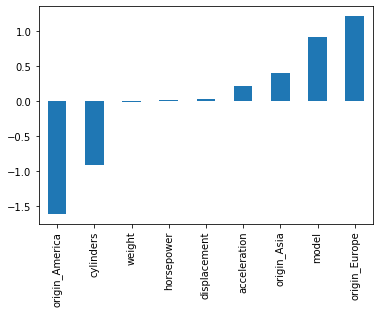

In [12]:
pd.Series(rm.coef_[0], x_train.columns).sort_values().plot(kind = 'bar')

In [13]:
y_predict = rm.predict(x_test)

In [14]:
import matplotlib.pyplot as plt
def plot_variance(y_predict, y_test, y_label='Mielage per Gallon'):
    plt.figure(figsize=(10,5))
    plt.plot(y_predict, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

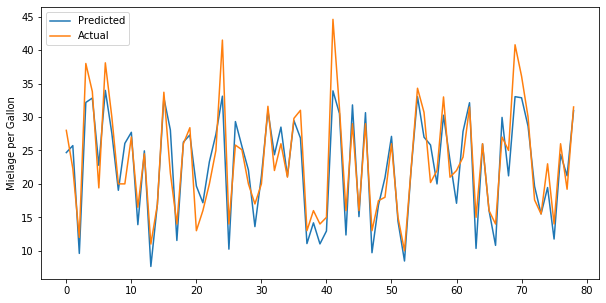

In [15]:
plot_variance(y_predict, y_test)

In [16]:
rm.score(x_test, y_test)

0.8262845397302738

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_predict, y_test))

3.285930481304526